In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

##  Ensayo de desgaste

En un ensayo de desgaste realizado en un aparato de rueda de goma y arena seca (ASTM-G65), con un diámetro de rueda de 8” y 0.5” de ancho una velocidad angular de 50 rpm durante el tiempo indicado y una carga aplicada de 130 N.

$$ V = K \frac{F_N}{H}d $$

$$ \delta =K \frac{F_N}{H} \frac{d}{A} =  \frac{V}{A} $$

Donde:
* $A$: Area de contacto $ [m^2] $
* $V$: Volumen de desgaste  $ [m^3] $
* $K$: Coeficiente de desgaste
* $ F_N$ : Fuerza normal aplicada durante ensayo $ [Kg] $
* $ \delta $: Profuniddad de desgaste $ [m] $
* $H$: Dureza del material menos duro $ [Pa] $

**Determinar:**

A) La masa perdida si se trata de un acero AISI 316L borurado con una densidad 6.92 g/cm3 y una dureza de 1685 Kg/mm2

B) El coeficiente de desgaste (K) del material en cuestión

C) La profundidad de la huella de desgaste si la longitud de la misma resultó de 6.5, 7.0, 7.5, 8.0, 8.5 cm. respectivamente.


In [2]:
path =r"data/ensayo_desgaste.xlsx"  # Archivo guardado               
xl_file = pd.read_excel(path)       # Abrir 
xl_file                             # Mostrar

,Tiempo (min),Deslizamiento (m),Tratamiento 2h,Tratamiento 4h,Tratamiento 6h
0,1,31.918,0.4000,0.3852,0.7407
1,2,63.837,0.4741,0.5037,0.8444
2,3,95.756,0.5481,0.5925,0.9629
3,4,127.675,0.6074,0.6518,1.0667
4,5,159.593,0.6814,0.7259,1.0962


In [3]:
def inch_to_cm(inch):
    """ Conveirte de pulgadas a cm """
    return inch*2.54

def cm_to_mm(cm):
    """ Convierte de cm a mm"""
    return cm*10
def get_perimeter(diametro):
    """ obtiene el perimetro """
    return np.pi*diametro

def distance(rpm,perimeter,time, verbose=True):
    """ Calcula la distancia recorriada por una rueda """
    dist =  cm_to_mm(rpm*perimeter*time)
    if verbose:
        print(F"Distancia recorida para {time} min, {dist} mm")
    return  dist

def mm3_to_mm(v):
    """ Convierte de mm3 a mm"""
    return v*1E-9


In [5]:
#### Aqui colocamos la informacion que se nos proporciona ###
densidad     =  6.92         # g/cm^3
densidad_mm3 = densidad/1000 # g/mm^3
dureza       =  1685         # Kg/mm^2
carga        = 130           # N
carga_kg     =  carga/9.81   # Kg
H            =  1685         # Kg/mm3
diametro     = inch_to_cm(8) # cm
perimetro    =  get_perimeter(diametro) # inch
ancho        =  inch_to_cm(0.5) # cm


### Validar distancias en tabla ##
min_1 = distance(rpm=50,perimeter=perimetro,time=1) # mm
min_2 = distance(rpm=50,perimeter=perimetro,time=2) # mm
min_3= distance(rpm=50,perimeter=perimetro,time=3) # mm
min_4 = distance(rpm=50,perimeter=perimetro,time=4) # mm
min_5 = distance(rpm=50,perimeter=perimetro,time=5) # mm


Distancia recorida para 1 min, 31918.5813604723 mm
Distancia recorida para 2 min, 63837.1627209446 mm
Distancia recorida para 3 min, 95755.7440814169 mm
Distancia recorida para 4 min, 127674.3254418892 mm
Distancia recorida para 5 min, 159592.9068023615 mm


### A)  Masa perdida
Para obtener las masas para los diversos tratamientos  multipilcaremos el volumen por la densidad (la cual fue convertida a $ g/mm^3 $):

In [6]:
masa = xl_file.iloc[:,2::].applymap(lambda x: x*densidad_mm3) # multiplicamos por densidad
print("Masa en gramos [g]")
masa                       


Masa en gramos [g]


,Tratamiento 2h,Tratamiento 4h,Tratamiento 6h
0,0.002768,0.002666,0.005126
1,0.003281,0.003486,0.005843
2,0.003793,0.004100,0.006663
3,0.004203,0.004510,0.007382
4,0.004715,0.005023,0.007586


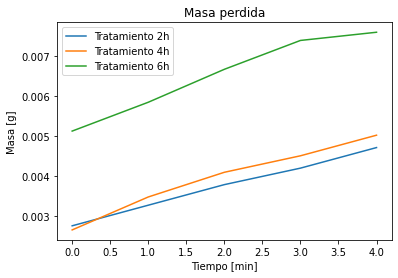

In [7]:
masa.plot()
plt.title("Masa perdida")
plt.xlabel("Tiempo [min]")
plt.ylabel("Masa [g]")
plt.show()

### B) Coeficiente de desgaste (K) 

In [8]:
def get_K(H,d,Fn,v):
    # K = v(H)/Fnd
    k = v*H/(Fn*d)
    return   k

def get_K_list(distancia_mm,tratamiento):
    K = list()
    for d,v in zip(distancia_mm,tratamiento ):
        k =  get_K(H=H,d=d,Fn=carga_kg ,v=v)
        K.append(k)
    K = np.array(K)
    return K

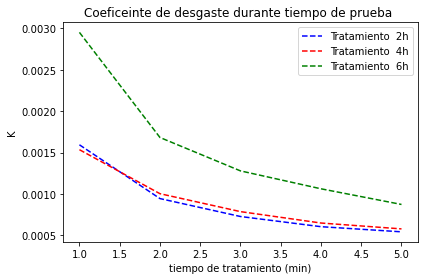

In [16]:
distancia_mm = np.array([min_1,min_2,min_3,min_4,min_5]) # Distancia en mm
tiempo = np.array([1,2,3,4,5])                 # Tiempo en min
tratamiento_2h= xl_file.iloc[:,2:3].to_numpy() # Volumen en mm^3
tratamiento_4h= xl_file.iloc[:,3:4].to_numpy() # Volumen en mm^3
tratamiento_6h= xl_file.iloc[:,4:5].to_numpy() # Volumen en mm^3
K_2 = get_K_list(distancia_mm,tratamiento_2h)  # K
K_4 = get_K_list(distancia_mm,tratamiento_4h)  # K
K_6 = get_K_list(distancia_mm,tratamiento_6h)  # K


plt.plot(tiempo,K_2,"b--",label="Tratamiento  2h")
plt.plot(tiempo,K_4,"r--",label="Tratamiento  4h")
plt.plot(tiempo,K_6,"g--",label="Tratamiento  6h")
plt.xlabel("tiempo de tratamiento (min)")
plt.ylabel("K")
plt.title("Coeficeinte de desgaste durante tiempo de prueba ")
plt.legend()
plt.tight_layout()
plt.show()

Observamos que en general un tratamiento de dos horas, entrega  un desgaste menor, esto apunta hacia la posibilidad de que si se expone el material a un tratamiento de mayor tiempo, este no obtiene beneficio, al contrario, su coefcieinte de desgaste aumenta!

### C)  Profunidad de Huella

In [24]:
def get_huella(area,tratamiento):
    huella= list()
    for a,v in zip(area,tratamiento ):
        h  = v/a
        huella.append(h)
    huella = np.array(huella)
    return huella

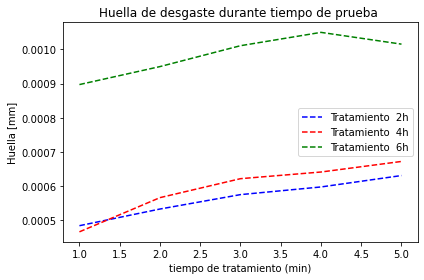

In [39]:
longitud = np.array([6.5, 7.0, 7.5, 8.0, 8.5]) # cm
longitud_mm = longitud*10                      # mm
ancho =  inch_to_cm(0.5)                       # cm
ancho_mm = ancho*10                            # mm
area_mm = longitud_mm*ancho_mm                 # mm^2
tratamiento_2h= xl_file.iloc[:,2:3].to_numpy() # Volumen en mm^3
tratamiento_4h= xl_file.iloc[:,3:4].to_numpy() # Volumen en mm^3
tratamiento_6h= xl_file.iloc[:,4:5].to_numpy() # Volumen en mm^3

H_2 = get_huella(area_mm,tratamiento_2h)  # mm
H_4 = get_huella(area_mm,tratamiento_4h)  # mm
H_6 = get_huella(area_mm,tratamiento_6h)  # mm

plt.plot(tiempo,H_2,"b--",label="Tratamiento  2h")
plt.plot(tiempo,H_4,"r--",label="Tratamiento  4h")
plt.plot(tiempo,H_6,"g--",label="Tratamiento  6h")
plt.xlabel("tiempo de tratamiento (min)")
plt.ylabel("Huella [mm]")
plt.title("Huella de desgaste durante tiempo de prueba ")
plt.legend()
plt.tight_layout()
plt.show()